In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [49]:
df = pd.read_csv("datasets/social-media.csv", index_col=0)

In [50]:
df

,UsageDuraiton,Age,Country,TotalLikes
UserId,,,,
1,2,55,Turkey,5
2,6,45,Canada,10
3,3,50,Ireland,7
4,4,35,South Africa,5
5,1,58,Turkey,2
...,...,...,...,...
58,2,51,Turkey,1
59,8,19,Germany,15
60,2,20,Bulgaria,4


In [27]:
df.isnull().sum()

UsageDuraiton    0
Age              0
Country          0
TotalLikes       0
dtype: int64

array([[<Axes: title={'center': 'UsageDuraiton'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'TotalLikes'}>, <Axes: >]], dtype=object)

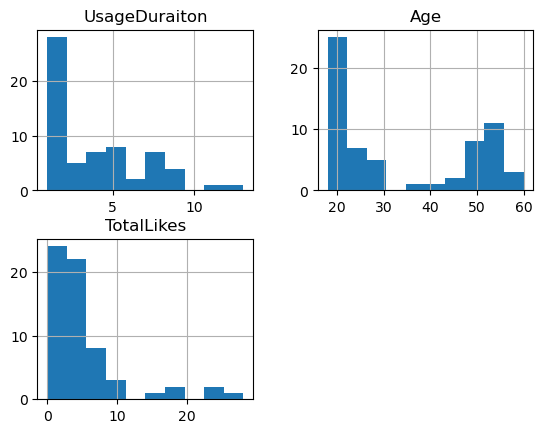

In [51]:
df.hist()

In [52]:
df['Country'] = df['Country'].astype('category').cat.codes

array([[<Axes: title={'center': 'UsageDuraiton'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'TotalLikes'}>]], dtype=object)

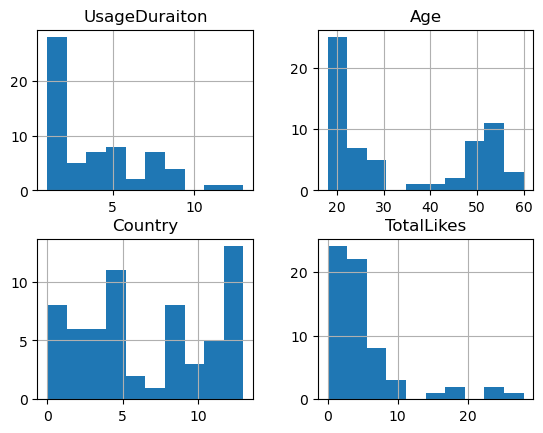

In [54]:
df.hist()

In [55]:

df_cleaned = df.copy()
# Aplicar Label Encoding a las columnas categóricas
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [56]:
# Instanciar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a todas las columnas
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df.columns)

In [57]:
correlation_matrix = df_normalized.corr()


In [58]:
correlation_matrix

,UsageDuraiton,Age,Country,TotalLikes
UsageDuraiton,1.000000,-0.643794,0.051192,0.685710
Age,-0.643794,1.000000,-0.070456,-0.476652
Country,0.051192,-0.070456,1.000000,0.118415
TotalLikes,0.685710,-0.476652,0.118415,1.000000


array([[<Axes: title={'center': 'UsageDuraiton'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'TotalLikes'}>]], dtype=object)

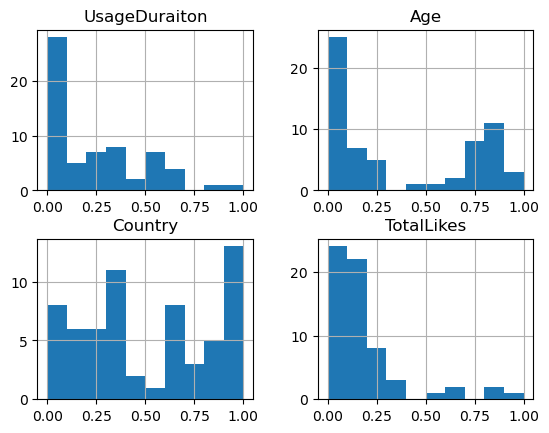

In [59]:
df_normalized.hist()

In [69]:
# Definir variables independientes (X) y dependiente (y)
X = df_normalized[['UsageDuraiton', 'Age', 'Country']]  # Variables independientes
y = df_normalized['TotalLikes']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar prediccio<nes
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Mostrar el coeficiente de determinación R^2 y el MSE
r2 = model.score(X_test, y_test)

mse, r2

(0.07455886240246498, 0.3807978542762316)

In [74]:
#Modelo de regresion logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Definir variables independientes (X) y dependiente (y)
X1 = df[['UsageDuraiton', 'Age', 'Country']]  # Variables independientes
y1 = df['TotalLikes'] > df['TotalLikes'].mean()  # Clasificación binaria: 1 si TotalLikes es mayor que el promedio

# Dividir los datos en conjunto de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train1, y_train1)

# Realizar predicciones
y_pred_logistic = logistic_model.predict(X_test1)

# Calcular la precisión y la matriz de confusión
accuracy = accuracy_score(y_test1, y_pred_logistic)
conf_matrix = confusion_matrix(y_test1, y_pred_logistic)

print("Accuracy: ",accuracy)
print("Matriz de confusion: \n",conf_matrix)


Accuracy:  0.9230769230769231
Matriz de confusion: 
 [[8 1]
 [0 4]]
